# PCA with iris 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal length', 'petal width', 'target'])
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4' ])
print(principalDataframe)

          PC1       PC2       PC3       PC4
0   -2.264542  0.505704 -0.121943 -0.023073
1   -2.086426 -0.655405 -0.227251 -0.103208
2   -2.367950 -0.318477  0.051480 -0.027825
3   -2.304197 -0.575368  0.098860  0.066311
4   -2.388777  0.674767  0.021428  0.037397
..        ...       ...       ...       ...
145  1.870522  0.382822  0.254532 -0.388890
146  1.558492 -0.905314 -0.025382 -0.221322
147  1.520845  0.266795  0.179277 -0.118903
148  1.376391  1.016362  0.931405 -0.024146
149  0.959299 -0.022284  0.528794  0.163676

[150 rows x 4 columns]


In [5]:
loadings = pd.DataFrame(pca.components_.T,  # transpose the matrix of loadings
    columns= ['PC1', 'PC2', 'PC3', 'PC4'],  # so the columns are the principal components
    index=features,  # and the rows are the original features
 )
loadings

,PC1,PC2,PC3,PC4
sepal length,0.522372,0.372318,-0.721017,-0.261996
sepal width,-0.263355,0.925556,0.242033,0.124135
petal length,0.581254,0.021095,0.140892,0.801154
petal width,0.565611,0.065416,0.633801,-0.523546


In [6]:
targetDataframe = df[['target']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(newDataframe)

          PC1       PC2       PC3       PC4          target
0   -2.264542  0.505704 -0.121943 -0.023073     Iris-setosa
1   -2.086426 -0.655405 -0.227251 -0.103208     Iris-setosa
2   -2.367950 -0.318477  0.051480 -0.027825     Iris-setosa
3   -2.304197 -0.575368  0.098860  0.066311     Iris-setosa
4   -2.388777  0.674767  0.021428  0.037397     Iris-setosa
..        ...       ...       ...       ...             ...
145  1.870522  0.382822  0.254532 -0.388890  Iris-virginica
146  1.558492 -0.905314 -0.025382 -0.221322  Iris-virginica
147  1.520845  0.266795  0.179277 -0.118903  Iris-virginica
148  1.376391  1.016362  0.931405 -0.024146  Iris-virginica
149  0.959299 -0.022284  0.528794  0.163676  Iris-virginica

[150 rows x 5 columns]


[72.77 23.03  3.68  0.52]


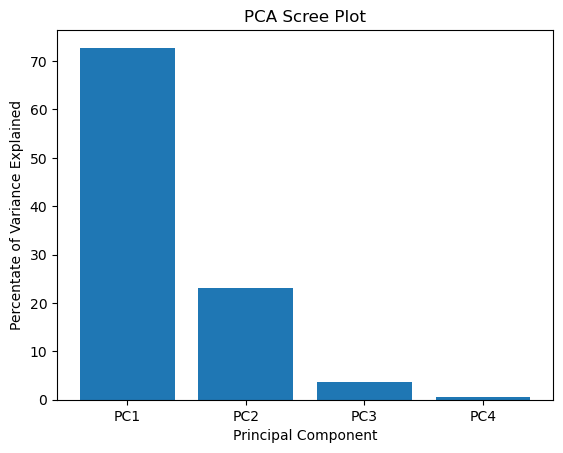

In [ ]:
#explained_variance_ratio_ : calculer le pourcentage de variance : la premiere a le plus de pourcentage (plot justicatif)
#le 2 eme et meme le 3 eme est suffisent 
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2) 
columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(percent_variance)
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

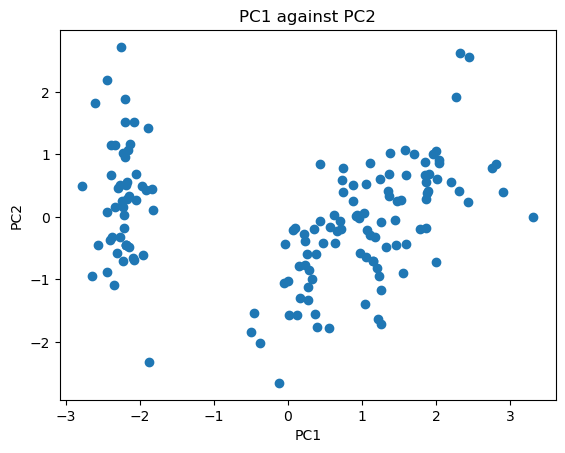

In [14]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

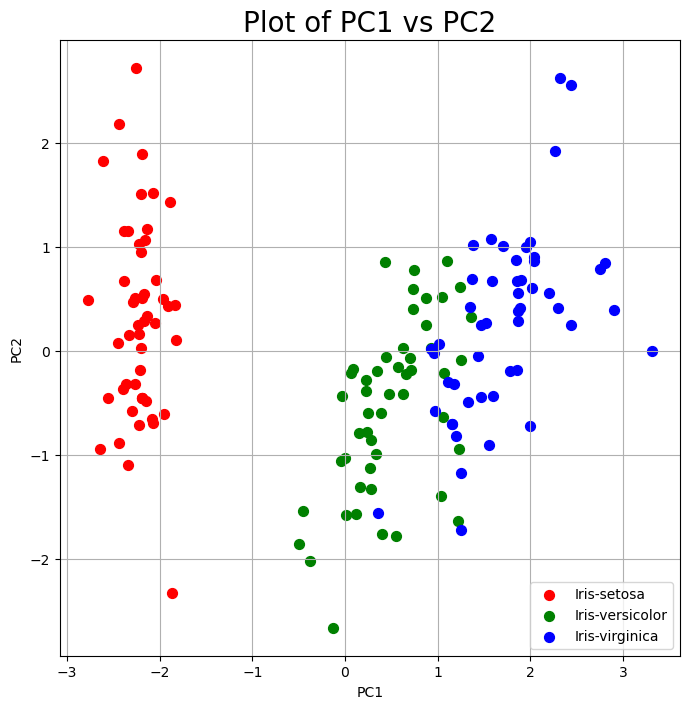

In [18]:
#pca est utiliseé dans le clustering 
#classification dans le nouveau espace 
# plus claire que l'espace d'origine
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of PC1 vs PC2', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

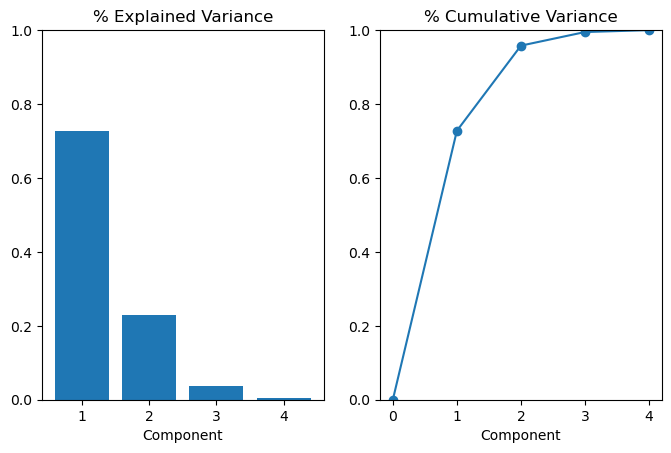

In [ ]:
pca.explained_variance_ratio_
def plot_variance(pca, width=8, dpi=100):
    # creation  figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
 # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
 # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
 # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
#  explained variance
plot_variance(pca)